In [5]:
pip install yfinance

     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
      --------------------------------------- 0.0/3.0 MB 393.8 kB/s eta 0:00:08
      --------------------------------------- 0.1/3.0 MB 409.6 kB/s eta 0:00:08
     - -------------------------------------- 0.1/3.0 MB 656.4 kB/s eta 0:00:05
     -- ------------------------------------- 0.2/3.0 MB 756.6 kB/s eta 0:00:04
     -- ------------------------------------- 0.2/3.0 MB 692.9 kB/s eta 0:00:04
     --- ------------------------------------ 0.3/3.0 MB 827.5 kB/s eta 0:00:04
     --- ------------------------------------ 0.3/3.0 MB 883.3 kB/s eta 0:00:04
     ---- ----------------------------------- 0.4/3.0 MB 857.5 kB/s eta 0:00:04
     ------- -------------------------------- 0.5/3.0 MB 1.2 MB/s eta 0:00:03
     -------- ------------------------------- 0.6/3.0 MB 1.2 MB/s eta 0:00:02
     ---------- ----------------------------- 0.8/3.0 MB 1.4 M

In [39]:
import yfinance as yf #this package download yahoo finance api to download daily stock index prices
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier #can pick up non linear relationships
from sklearn.metrics import precision_score

In [10]:
sp500 = yf.Ticker("^GSPC")

In [13]:
sp500 = sp500.history(period = "max") #query all the data from the first when the index was created

In [14]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-05-20 00:00:00-04:00,5305.350098,5325.319824,5302.399902,5308.129883,3420100000,0.0,0.0
2024-05-21 00:00:00-04:00,5298.689941,5324.319824,5297.870117,5321.410156,3662240000,0.0,0.0
2024-05-22 00:00:00-04:00,5319.279785,5323.180176,5286.009766,5307.009766,3847130000,0.0,0.0


In [15]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-05-13 00:00:00-04:00', '2024-05-14 00:00:00-04:00',
               '2024-05-15 00:00:00-04:00', '2024-05-16 00:00:00-04:00',
               '2024-05-17 00:00:00-04:00', '2024-05-20 00:00:00-04:00',
               '2024-05-21 00:00:00-04:00', '2024-05-22 00:00:00-04:00',
               '2024-05-23 00:00:00-04:00', '2024-05-24 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24216, freq=None)

<h1>Cleaning and visualizing </h1>

<Axes: xlabel='Date'>

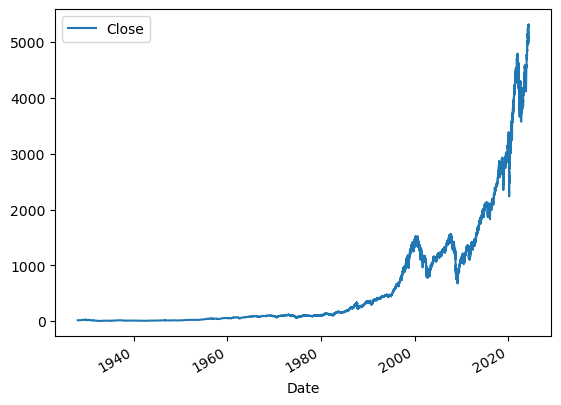

In [17]:
sp500.plot.line(y="Close" , use_index = True)

In [21]:
sp500.drop(columns = ["Dividends"] , inplace = True)

In [22]:
del sp500["Stock Splits"]

<h1>Setting targets for our model</h1>

In [23]:
sp500["Tommorrow"] = sp500["Close"].shift(-1)

In [24]:
sp500

,Open,High,Low,Close,Volume,Tommorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-05-20 00:00:00-04:00,5305.350098,5325.319824,5302.399902,5308.129883,3420100000,5321.410156
2024-05-21 00:00:00-04:00,5298.689941,5324.319824,5297.870117,5321.410156,3662240000,5307.009766
2024-05-22 00:00:00-04:00,5319.279785,5323.180176,5286.009766,5307.009766,3847130000,5267.839844


In [25]:
#add a column to indicate when the price is higher or goes up
sp500["Target"] = (sp500["Tommorrow"] > sp500["Close"]).astype(int)

In [26]:
sp500

,Open,High,Low,Close,Volume,Tommorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-05-20 00:00:00-04:00,5305.350098,5325.319824,5302.399902,5308.129883,3420100000,5321.410156,1
2024-05-21 00:00:00-04:00,5298.689941,5324.319824,5297.870117,5321.410156,3662240000,5307.009766,0
2024-05-22 00:00:00-04:00,5319.279785,5323.180176,5286.009766,5307.009766,3847130000,5267.839844,0


In [27]:
sp500 = sp500.loc["1990-01-01":].copy()

In [28]:
sp500

,Open,High,Low,Close,Volume,Tommorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-05-20 00:00:00-04:00,5305.350098,5325.319824,5302.399902,5308.129883,3420100000,5321.410156,1
2024-05-21 00:00:00-04:00,5298.689941,5324.319824,5297.870117,5321.410156,3662240000,5307.009766,0
2024-05-22 00:00:00-04:00,5319.279785,5323.180176,5286.009766,5307.009766,3847130000,5267.839844,0


<h1>training initial ML model</h1>

In [49]:
model = RandomForestClassifier(n_estimators = 100 ,min_samples_split = 100,random_state = 1)

train = sp500.iloc[:-200]
test = sp500.iloc[-200:]

predictors = ["Close" ,"Open" ,"High" , "Low" , "Volume"]

model.fit(train[predictors] , train["Target"])



RandomForestClassifier(min_samples_split=100, random_state=1)

In [50]:
preds = model.predict(test[predictors])

In [51]:
preds = pd.Series(preds, index = test.index)

In [52]:
preds

Date
2023-08-10 00:00:00-04:00    1
2023-08-11 00:00:00-04:00    1
2023-08-14 00:00:00-04:00    1
2023-08-15 00:00:00-04:00    1
2023-08-16 00:00:00-04:00    1
                            ..
2024-05-20 00:00:00-04:00    0
2024-05-21 00:00:00-04:00    0
2024-05-22 00:00:00-04:00    0
2024-05-23 00:00:00-04:00    0
2024-05-24 00:00:00-04:00    0
Length: 200, dtype: int32

In [53]:
precision_score(test["Target"],preds)

0.4827586206896552

In [55]:
combined = pd.concat([test["Target"] , preds],axis=1)

<Axes: xlabel='Date'>

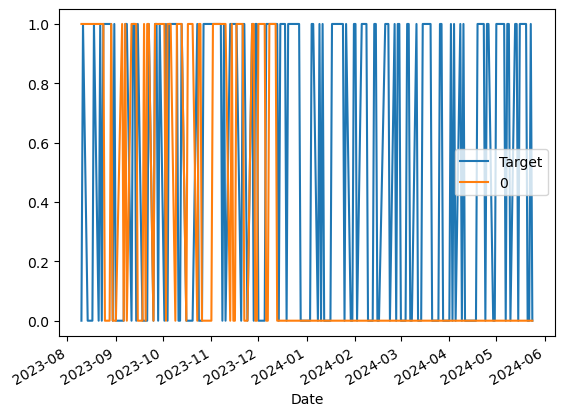

In [56]:
combined.plot()

<h1>building backtrack system</h1> 

In [78]:
def predict(train , test , predictors , model):
    model.fit(train[predictors],train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds , index = test.index, name = "Predictions")
    combined = pd.concat([test["Target"],preds],axis=1)
    return combined

In [87]:
def backtest(data , mode, predictors , start=2500,step=250):
    all_predictons = []

    for i in range(start , data.shape[0],step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train , test,predictors,model)
        all_predictons.append(predictions)
    return pd.concat(all_predictons)
        

In [88]:
predictions = backtest(sp500, model , predictors)

In [89]:
predictions["Predictions"].value_counts()

Predictions
0    3478
1    2688
Name: count, dtype: int64

In [90]:
precision_score(predictions["Target"] , predictions["Predictions"])

0.5282738095238095

In [92]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.534706
0    0.465294
Name: count, dtype: float64

<h1>Adding additonal predictors to our model</h1>

In [94]:
horizons = [2,5,60,250,1000]

new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

    new_predictors += [ratio_column , trend_column] 

In [100]:
sp500.head()

,Open,High,Low,Close,Volume,Tommorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0


In [97]:
sp500 = sp500.dropna()

In [98]:
sp500

,Open,High,Low,Close,Volume,Tommorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-17 00:00:00-04:00,5303.100098,5305.450195,5283.589844,5303.270020,3578120000,5308.129883,1,1.000582,1.0,1.005297,3.0,1.030199,31.0,1.135896,140.0,1.271019,531.0
2024-05-20 00:00:00-04:00,5305.350098,5325.319824,5302.399902,5308.129883,3420100000,5321.410156,1,1.000458,2.0,1.002922,4.0,1.030411,31.0,1.135851,140.0,1.271493,531.0
2024-05-21 00:00:00-04:00,5298.689941,5324.319824,5297.870117,5321.410156,3662240000,5307.009766,0,1.001249,2.0,1.002600,4.0,1.032148,32.0,1.137548,141.0,1.273983,531.0


In [102]:
model = RandomForestClassifier(n_estimators = 200, min_samples_split = 50 , random_state =1)

In [105]:
def predict(train , test , predictors , model):
    model.fit(train[predictors],train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6]=1
    preds[preds < .6]=0    
    preds = pd.Series(preds , index = test.index, name = "Predictions")
    combined = pd.concat([test["Target"],preds],axis=1)
    return combined 

In [106]:
predictions = backtest(sp500 , model , new_predictors)

In [107]:
predictions["Predictions"].value_counts()

Predictions
0.0    4330
1.0     835
Name: count, dtype: int64

In [108]:
precision_score(predictions["Target"],predictions["Predictions"])

0.5736526946107784

download stock data from s&p 500 index 
we cleand and visualize
setup machine learinng targets
trained our initial model
evaulated error and creatd a way to backtest and accurate measure that error over long peroid of time
improve our model with extra predictors columns
